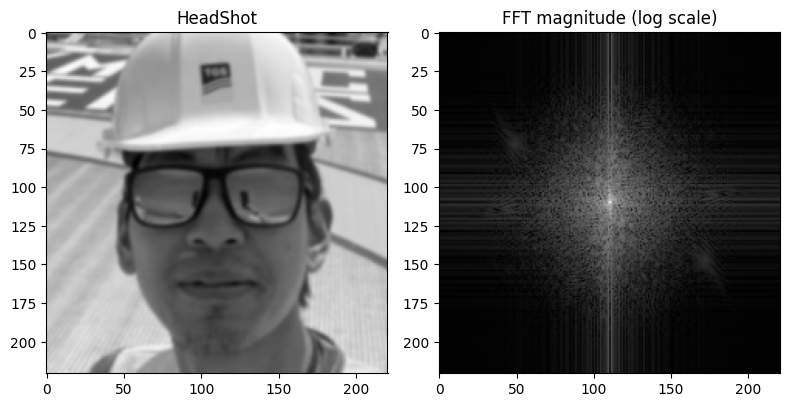

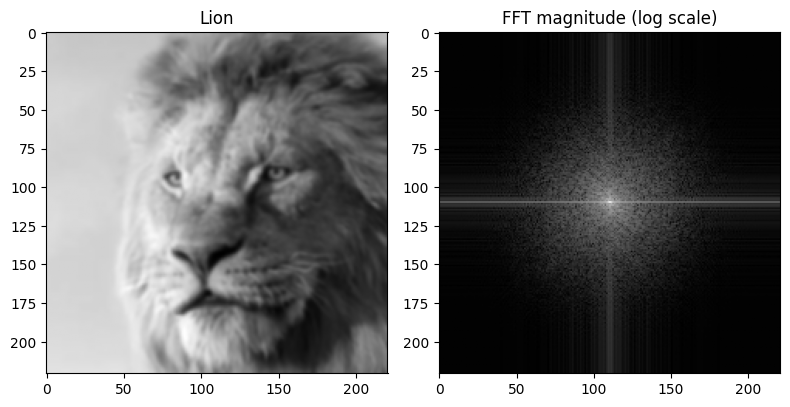

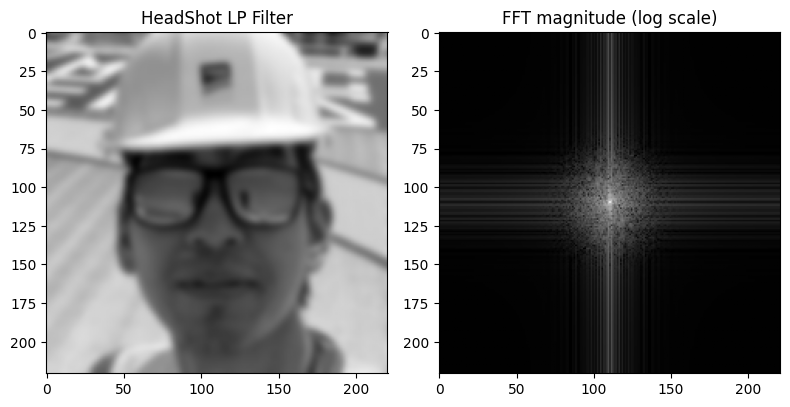

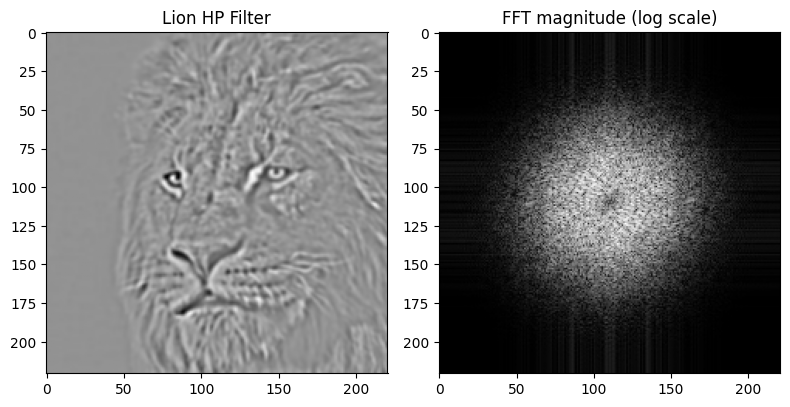

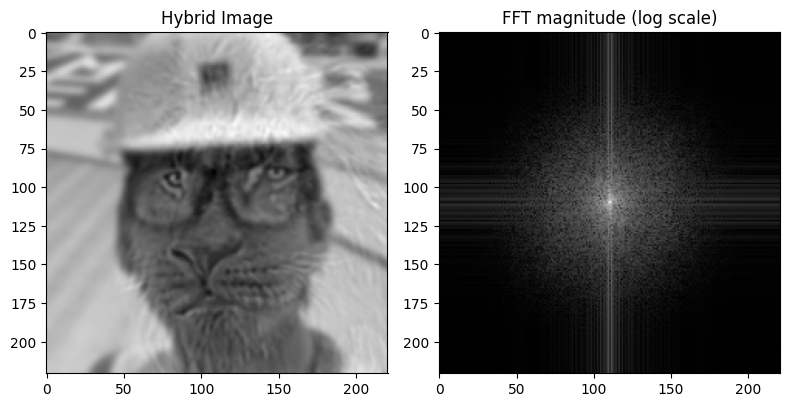

In [ ]:
from skimage import io
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage import util
import numpy as np
from skimage import filters

def bottom_square_crop(img, size=900):
    h, w = img.shape[:2]
    size = min(size, h, w)   # make sure it fits
    top = h - size
    left = (w - size) // 2   # center horizontally
    return img[top:h, left:left+size]

def downsample(img, iters=2):
    img_blur = img
    for _ in range(iters):
        img_blur = filters.gaussian(img_blur, sigma=2)
        img_blur = img_blur[::2, ::2]
    return img_blur

def show_image_and_fft(img, title=""):
    # Builtin Fourier Transofrm
    F = np.fft.fft2(img)
    Fshift = np.fft.fftshift(F)          
    mag = np.abs(Fshift)                 
    mag_log = np.log1p(mag) 

    # Plot
    plt.figure(figsize=(8,4))

    plt.subplot(1,2,1)
    plt.imshow(img, cmap='gray')
    plt.title(title)

    plt.subplot(1,2,2)
    plt.imshow(mag_log, cmap='gray')
    plt.title("FFT magnitude (log scale)")

    plt.tight_layout()
    plt.show()

# preprocessing data:
me = io.imread('newpics/me.png')
me = rgb2gray(me)
me = util.img_as_float32(me)
me = bottom_square_crop(me)
me = downsample(me, iters=2)
cat = io.imread('newpics/lion.png')
cat = rgb2gray(cat)
cat = util.img_as_float32(cat)
cat = bottom_square_crop(cat)
cat = downsample(cat, iters=2)

# apply gaussian filter and computer the Fourier Transform:
me_lp = filters.gaussian(me, sigma=2)
cat_lp = filters.gaussian(cat, sigma=2)
cat_hp = cat - cat_lp
hybrid = me_lp*1.0 + cat_hp*1.2
show_image_and_fft(me, 'HeadShot')
show_image_and_fft(cat, 'Lion')
show_image_and_fft(me_lp, 'HeadShot LP Filter')
show_image_and_fft(cat_hp, 'Lion HP Filter')
show_image_and_fft(hybrid, 'Hybrid Image')
